In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/30.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/29.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/28.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/32 (2).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/27 (2).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/31.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/32.jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/30 (2).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/ModerateDemented/29 (2).jpg
/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/test/Moderate

In [2]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

2024-05-21 03:38:38.566617: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-21 03:38:38.566746: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-21 03:38:38.853509: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [27]:
base_dir = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train'

In [28]:
image_path = "/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/ModerateDemented/moderateDem0.jpg"

In [29]:
img = mpimg.imread(image_path)

(208, 176)


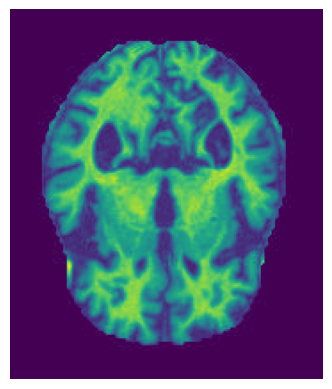

In [30]:
print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [31]:
img = mpimg.imread(image_path)

In [32]:
img_size = 224
batch_size = 32
     

In [33]:
#Image Data Generator 
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split =0.2
)



In [34]:
train_generator = data_gen.flow_from_directory(
        base_dir,
        target_size =(img_size,img_size),
    batch_size = batch_size,
    subset ='training',
    class_mode = 'categorical'
)

Found 4098 images belonging to 4 classes.


In [35]:
validation_generator = data_gen.flow_from_directory(
     base_dir,
        target_size =(img_size,img_size),
    batch_size = batch_size,
    subset ='validation',
    class_mode = 'categorical'
)

Found 1023 images belonging to 4 classes.


In [36]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation ='relu', input_shape=(img_size, img_size, 3)))

model.add(layers.Conv2D(32,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
          
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(train_generator.num_classes,activation='softmax'))

In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 387200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │    99,123,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 99,134,628 (378.17 MB)

 Trainable params: 99,134,628 (378.17 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples//batch_size,
    epochs =5,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples//batch_size

)

Epoch 1/5
  2/128 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.1953 - loss: 9.4590

W0000 00:00:1716264437.301197     103 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.5182 - loss: 3.0188

W0000 00:00:1716264451.458407     104 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


128/128 ━━━━━━━━━━━━━━━━━━━━ 19s 129ms/step - accuracy: 0.5190 - loss: 3.0059 - val_accuracy: 0.3730 - val_loss: 1.5636
Epoch 2/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7812 - loss: 0.5291 - val_accuracy: 0.4516 - val_loss: 1.3247
Epoch 3/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.9093 - loss: 0.2774 - val_accuracy: 0.5131 - val_loss: 1.4268
Epoch 4/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - accuracy: 0.9688 - loss: 0.0835 - val_accuracy: 0.5161 - val_loss: 1.2077
Epoch 5/5
128/128 ━━━━━━━━━━━━━━━━━━━━ 14s 101ms/step - accuracy: 0.9885 - loss: 0.0472 - val_accuracy: 0.5302 - val_loss: 1.7612


In [40]:
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.5456 - loss: 1.6032
Validation Accuracy: 52.82%


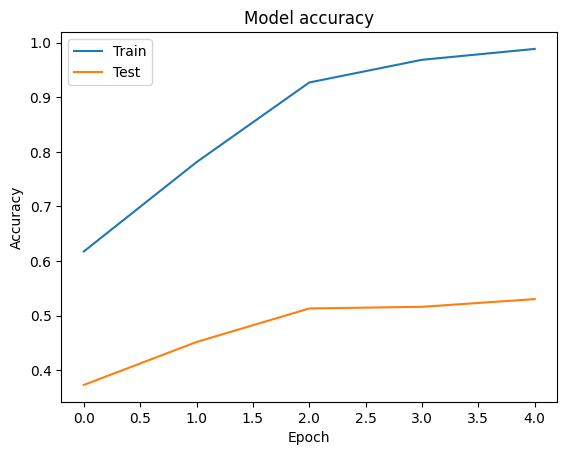

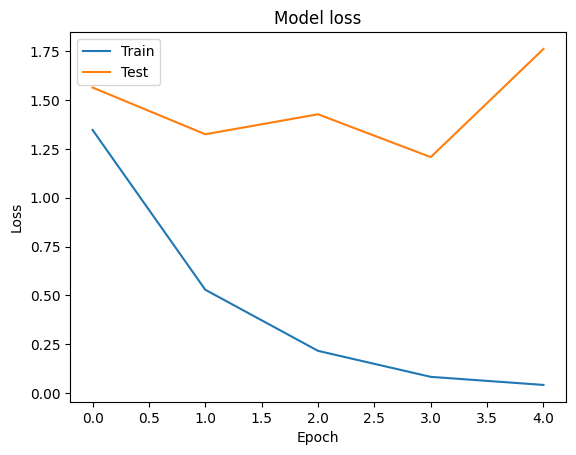

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [42]:
def load_preprocess_image(image_path,target_size=(224,224)):
    img = Image.open(image_path)
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array,axis=0)
    img_array = img_array.astype('float32')/255.
    return img_array

In [53]:
def predict_image_class(model,image_path,class_indices):
    preprocessed_img = load_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions,axis-1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [50]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [51]:
class_indices

{0: 'MildDemented',
 1: 'ModerateDemented',
 2: 'NonDemented',
 3: 'VeryMildDemented'}

In [56]:
# test_img_path = '/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset/train/MildDemented/mildDem103.jpg'
# predicted_class_name = predict_image_class(model,image_path,class_indices)
# print(predicted_class_name)